### Execution time analysis for minimum algorithms

This notebook wants to highlight the differences in term of execution time of the various algorithm used, the comparision is made between:
- Serial algorithm
- GPU algorithm using atomic operation on a global variable
- GPU Optimistic algorithm 

In [12]:
import pandas as pd

In [13]:
data = pd.read_csv("time_analysis.csv", header=0, names=["type", "size", "time[us]"])
data.head()

,type,size,time[us]
0,atomic,100,154036
1,serial,100,1
2,optimistic,100,151
3,atomic,100,151334
4,serial,100,1


In [14]:
average_time = data.groupby(["type", "size"]).mean()
average_time

time[us]
type       size                 
atomic     100     148478.666667
           500     142552.666667
           1000    144144.666667
           5000    155069.666667
           10000   147876.333333
           100000  147465.666667
           500000  140129.000000
optimistic 100        145.000000
           500        137.666667
           1000       139.666667
           5000       171.000000
           10000      141.000000
           100000     138.333333
           500000     139.000000
serial     100          1.000000
           500          5.000000
           1000        10.000000
           5000        50.333333
           10000      101.000000
           100000    1009.000000
           500000    5048.000000

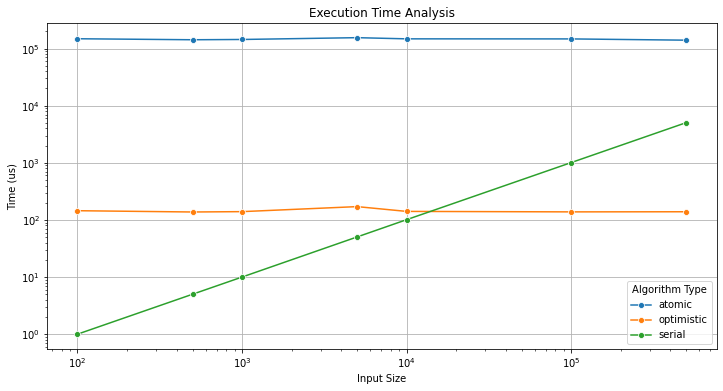

In [15]:
import seaborn as sns

import matplotlib.pyplot as plt

# Reset the index to use 'type' and 'size' as columns
average_time_reset = average_time.reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_time_reset, x='size', y='time[us]', hue='type', marker='o')
plt.title('Execution Time Analysis')
plt.xlabel('Input Size')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Time (us)')
plt.legend(title='Algorithm Type')
plt.grid(True)
plt.show()

From the plot we can see how the atomic method works bad, this behaviour is caused by the atomic operation which slows down the code. We can see insead a very good speed-up for arrays with size greater then 10000 elements.